# ANOVA and Chi Square 

### Practice Exercise 1

A company makes three types of electronic device.
Life time in hours for each type of electronic device is given below:

* life_type_A = [ 407, 411, 409 ]
* life_type_B = [ 404, 406, 408, 405, 402 ]
* ife_type_C  = [ 410, 408, 406, 408]

### Hint

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
from scipy.stats import stats

In [2]:
life_type_A = np.array([407, 411, 409 ])
life_type_B = np.array([404, 406, 408, 405, 402 ])
life_type_C  = np.array([410, 408, 406, 408])

### a)  Plot box plot for the above data and write your inference on the group means from the boxplots.

In [3]:
df = pd.DataFrame()
df1 = pd.DataFrame({'Type': 'A' , 'Life Time': life_type_A})
df2 = pd.DataFrame({'Type': 'B' , 'Life Time': life_type_B})
df3 = pd.DataFrame({'Type': 'C' , 'Life Time': life_type_C})

df = df.append(df1)
df =df.append(df2)
df =df.append(df3)
df

,Type,Life Time
0,A,407
1,A,411
2,A,409
0,B,404
1,B,406
2,B,408
3,B,405
4,B,402
0,C,410
1,C,408


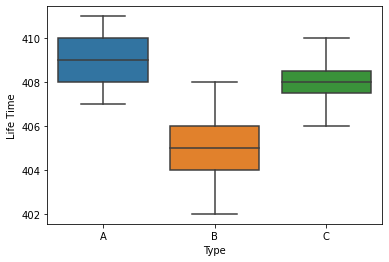

In [4]:
sns.boxplot(x= 'Type' , y = 'Life Time' , data=df)
plt.show()

### b)  At 5% level of significance, is there any difference in the average lifetimes of the three types?

In [5]:
stats.f_oneway(life_type_A,life_type_B,life_type_C)

F_onewayResult(statistic=4.5, pvalue=0.04419417382415922)

##### Observation: As p_value is less than 0.05, we can say that there is difference in the average lifetimes of the three types

### c)  If  you were able to reject the null hypothesis, you can proceed with post-hoc analysis to determine which means are different 

In [6]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df['Life Time'] , df['Type'] , alpha=0.1))

Multiple Comparison of Means - Tukey HSD, FWER=0.10
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     -4.0 0.0541  -7.422 -0.578   True
     A      C     -1.0 0.7824 -4.5788 2.5788  False
     B      C      3.0 0.1177 -0.1433 6.1433  False
---------------------------------------------------


##### Observation : Post-Hock Analysis suggests all the three type are significantly different from each other.

### Practice Exercise 2

### A sample of number of sell of a particular product over different days in different stores have been collected.Perform a test to check whether different stores and different days have any effect on the number of products that have been sold.

In [10]:
table1  = [['Day','Store-A','Store-B','Store-C','Store-D','Store-E'], [1,69, 71, 64, 67, 56],\
           [2, 68, 76, 79, 87, 76], [3, 71, 77, 74, 84, 72], [4, 70, 73, 71, 78, 73], [5, 60, 64, 67, 79, 58]]

In [11]:

headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1)

   Day  Store-A  Store-B  Store-C  Store-D  Store-E
0    1       69       71       64       67       56
1    2       68       76       79       87       76
2    3       71       77       74       84       72
3    4       70       73       71       78       73
4    5       60       64       67       79       58


### 1. Checking if there is any diiference in mean corresponding to store and days individually

In [12]:
Store_A = np.array(df1['Store-A'].values)
Store_B = np.array(df1['Store-B'].values)
Store_C = np.array(df1['Store-C'].values)
Day_ = np.array(df1['Day'].values)

df_new= pd.DataFrame()

dfA = pd.DataFrame({'Day':Day_ , 'Store': 'Store_A' , 'Sales' : Store_A})
dfB = pd.DataFrame({'Day':Day_ , 'Store': 'Store_B' , 'Sales' : Store_B})
dfC = pd.DataFrame({'Day':Day_ , 'Store': 'Store_C' , 'Sales' : Store_C})

df_new = df_new.append(dfA)
df_new = df_new.append(dfB)
df_new = df_new.append(dfC)
df_new

,Day,Store,Sales
0,1,Store_A,69
1,2,Store_A,68
2,3,Store_A,71
3,4,Store_A,70
4,5,Store_A,60
0,1,Store_B,71
1,2,Store_B,76
2,3,Store_B,77
3,4,Store_B,73
4,5,Store_B,64


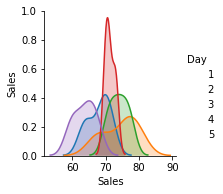

In [13]:
sns.pairplot(df_new,hue='Day',diag_kind='kde')
plt.show()

In [14]:
from scipy.stats import f_oneway

In [15]:
f_oneway(Store_A,Store_B,Store_C)

F_onewayResult(statistic=1.0608695652173916, pvalue=0.37649426832809046)

#### Observation : There is no difference in Mean coressponding to Store

In [16]:
Day1 = np.array(df_new[df_new['Day']==1]['Sales'].values)
Day2 = np.array(df_new[df_new['Day']==2]['Sales'].values)
Day3 = np.array(df_new[df_new['Day']==3]['Sales'].values)
Day4 = np.array(df_new[df_new['Day']==4]['Sales'].values)
Day5 = np.array(df_new[df_new['Day']==5]['Sales'].values)

In [17]:
f_oneway(Day1,Day2,Day3,Day4,Day5)

F_onewayResult(statistic=4.3647342995169085, pvalue=0.026770967318745183)

#### Observation : There is no difference in Mean coressponding to Store

### 2.ANNOVA Model

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'Sales ~ Day + Store'
model = ols(formula,df_new).fit()
anova_table = anova_lm(model,type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Store,2.0,56.933333,28.466667,1.113693,0.362704
Day,1.0,40.833333,40.833333,1.597510,0.232384
Residual,11.0,281.166667,25.560606,NaN,NaN


### 3. Post-Hoc Analysis

In [75]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df_new['Sales'],df_new['Store'],alpha=0.05))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Store_A Store_B      4.6 0.3703 -4.1361 13.3361  False
Store_A Store_C      3.4 0.5674 -5.3361 12.1361  False
Store_B Store_C     -1.2    0.9 -9.9361  7.5361  False
------------------------------------------------------


#### Observation : There is no difference in Mean coressponding to Store

In [76]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df_new['Sales'],df_new['Day'],alpha=0.05))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2   6.3333  0.296   -3.651 16.3177  False
     1      3      6.0 0.3413  -3.9843 15.9843  False
     1      4   3.3333 0.7845   -6.651 13.3177  False
     1      5  -4.3333 0.6151 -14.3177   5.651  False
     2      3  -0.3333    0.9 -10.3177   9.651  False
     2      4     -3.0  0.841 -12.9843  6.9843  False
     2      5 -10.6667 0.0353  -20.651 -0.6823   True
     3      4  -2.6667 0.8975  -12.651  7.3177  False
     3      5 -10.3333 0.0418 -20.3177  -0.349   True
     4      5  -7.6667   0.16  -17.651  2.3177  False
-----------------------------------------------------


#### Observation : There is no difference in Mean coressponding to Days except 
1. Sales on Day 2 and Day 5 is significantly different
1. Sales on Day 3 and Day 5 is significantly different

## Chi Square

### Practice Exercise 3

A1 airlines operated daily flights to several Indian cities. The operations manager believes that 28% of their passengers prefer vegan food, 42% prefer vegetarian food , 25% prefer non-veg food 5% request for Jain food. 

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

|               | Food type | Vegan | Vegetarian | Non-Vegetarian | Jain |
| ------------------------- | ---- | ---- | ----- | ---- | ---- |
|Number of passengers |  | 190 | 185 | 90 | 35 |

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

In [22]:
import scipy.stats as stats
import scipy

observed_values    = np.array([190, 185, 90, 35])
n                  = observed_values.sum()


In [23]:
expected_values = np.array([500*0.28, 500*0.42, 500*0.25, 500*0.05])

In [27]:
chisquare , p_value = stats.chisquare(observed_values,expected_values)
print('At 5 %s level of significance, the p-value is %1.7f' %('%',p_value))

At 5 % level of significance, the p-value is 0.0000001


##### Observation : As the P value comes out to be very less than 0.05 , There is significant difference between observed and Expected values and the meal preference is NOT as per the belief of the operations manager

### Chi-square tests of independence

### Practice Exercise 4

A Cable service provider company is interested in checking whether or not the customer churn depends on customer segment.  Use 5% as level of significance

| Customer Segment | Churned | Retained |
|  -------- | ----- | ---- |
| S1 | 15 | 142 |
| S2 | 24 | 400 |
| S3 | 30 | 389 |


#### Hint

In [28]:
import numpy       as np
import scipy.stats as stats

churn_array = np.array([[15,142],[24, 400],[30, 389]])


In [29]:
stats.chi2_contingency(churn_array)

(2.779977047087869,
 0.24907816314986156,
 2,
 array([[ 10.833, 146.167],
        [ 29.256, 394.744],
        [ 28.911, 390.089]]))

##### Observation : As p value is more than 0.05, We fail to reject null hypothesis and come to the conclusion that  customer churn does not depend on customer segment

## E N D  